In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will use pandas to read data.

First we need to start with the proper imports.


### The Imports

In [3]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We will use the stocks information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

The stocks information is stored in a pickle file and it is called **'all_banks'**. It contains the stocks data from Jan 1st 2006 to Jan 1st 2016 for each of the above banks.

**We will set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a figuring out the ticker symbol for each bank.**

In [4]:
# Read the stocks data from pickle file
df = pd.read_pickle('all_banks')

In [5]:
#Bank of America
BAC = df['BAC']
#CitiGroup
C = df['C']
#Goldman Sachs
GS = df['GS']
#JPMorgan Chase
JPM = df['JPM']
#Morgan Stanley
MS = df['MS']
#Wells Fargo
WFC = df['WFC']

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. We need to concatenate the bank dataframes along columns so axis should be set equal to 1.**

In [7]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

**Set the column name levels:**

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**The head of the bank_stocks dataframe is shown below.**

In [9]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# Exploratory Data Analysis

Let's explore the data a bit! You can check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and using [.xs()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) if you are not fimilar with their use. We will use **.xs()** quite often in this project.

**The max Close price for each bank's stock throughout the time period can be obtained as shown below:**

In [36]:
bank_stocks.xs(key='Close',level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**The min Close price for each bank's stock throughout the time period can be obtained as shown below:**

In [37]:
bank_stocks.xs(key='Close',level='Stock Info', axis=1).min()

Bank Ticker
BAC     3.14
C       4.52
GS     52.00
JPM    15.90
MS      9.20
WFC     8.12
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [39]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and sets it as a column in the returns DataFrame.**

In [12]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Next, we will create a pairplot (using seaborn) of the returns dataframe to see the correlation between the returns.**

In [13]:
import seaborn as sns
sns.set() # to show grid lines on plot

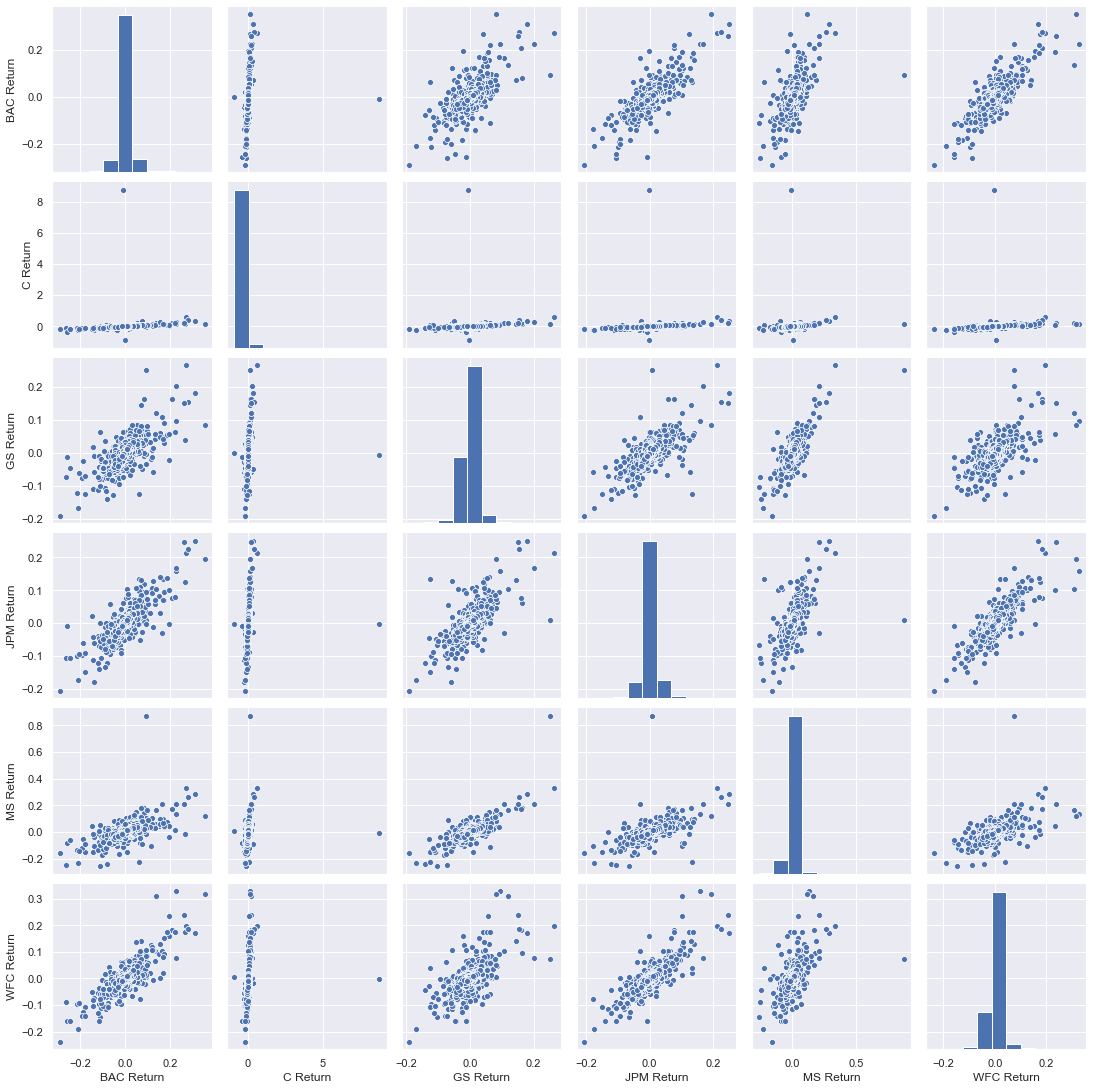

In [14]:
sns.pairplot(data=returns)

**Question:** From the pairplot of the returns dataframe above, what stock stands out to you? Can you figure out why?

**Answer:** Most of the scatter plots look relatively normal and there is some correlation between the returns. However, we can see there is a weird straight line along the **C Return** column which makes the Citigroup's stock stand out. This is because the Citigroup actually had a huge stock crash in Novermber 2008 during the global financial crisis.

**Using this returns DataFrame, we can figure out on what dates each bank stock had the best and worst single day returns.**

In [15]:
# date with worst single day returns
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
# date with best single day returns
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame?**

**Ans:** Yes, Citigroup announced the effectiveness of its 1-for-10 reverse stock split at 4:10 pm on Friday, May 6, 2011.

**Next, we can take a look at the standard deviation of the returns DataFrame and figure out which stock was the riskiest over the entire time period.**

In [17]:
returns.std() # Citigroup's stock is riskiest over entire time period as its return has highest standard deviation

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

**Which stock would you classify as the riskiest for the year 2015?**

In [18]:
# MS stock is riskiest in 2015 as its return has highest standard deviation
returns.reset_index()[returns.reset_index()['Date'].apply(lambda x:x.year==2015)].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [19]:
# Alternate method to get standard deviation of the returns for year 2015
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

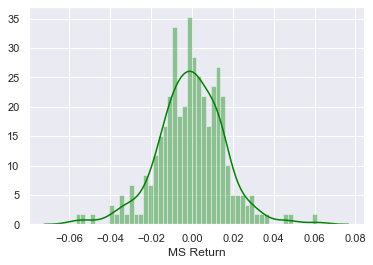

In [20]:
# Method 1 - distplot of 2015 returns for Morgan Stanley
returns_2015 = returns.reset_index()[returns.reset_index()['Date'].apply(lambda x:x.year==2015)]['MS Return']
sns.distplot(returns_2015, bins=50, color='green')

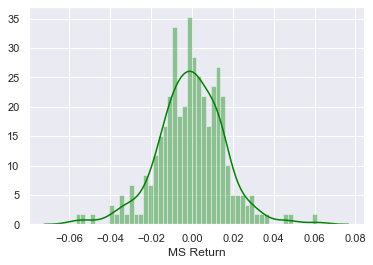

In [21]:
# Method 2 - distplot of 2015 returns for Morgan Stanley
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=50, color='green' )

**Note:** The displots of 2015 returns for Morgan Stanley show that distrbution of returns is pretty stable and deviation is only 0.06 from the average.

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

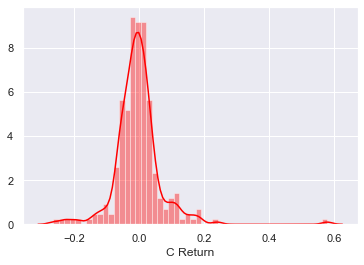

In [22]:
# Method 1 - distplot of 2008 returns for CitiGroup
returns_2008 = returns.reset_index()[returns.reset_index()['Date'].apply(lambda x:x.year==2008)]['C Return']
sns.distplot(returns_2008, bins=50, color='red')

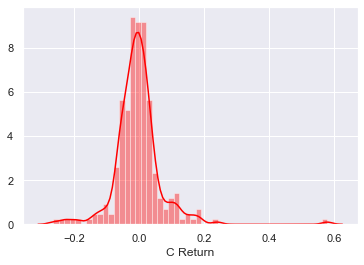

In [23]:
# Method 2 - distplot of 2008 returns for CitiGroup
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins=50, color='red')

**Note:** The displots of 2008 returns for Citigroup show that the standard deviation is actually quite a bit more stretched out and deviation is upto 0.6 from the average which is much higher than a normal year. For example, in a normal banking year, we saw that deviation was just 0.06 for Morgan Stanley in 2015. This is an indication of the financial crisis in 2008. 


# More Visualization

Next, we will create some more visualizations to further analyze the stocks data.

### Imports

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time.**

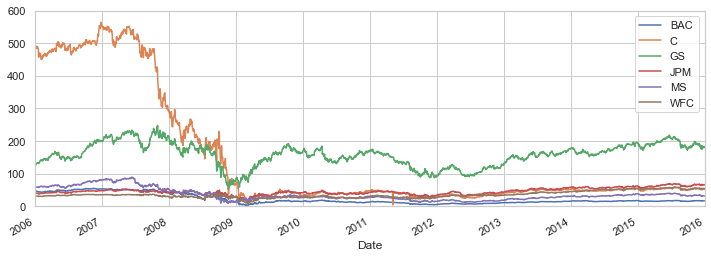

In [41]:
# Method 1 - for loop
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()
plt.xlim(('2006','2016'))
plt.ylim((0,600));

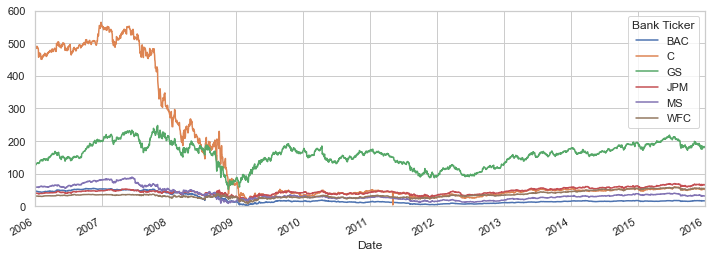

In [26]:
# Method 2 - cross section
bank_stocks.xs(key='Close',level='Stock Info',axis=1).plot(figsize=(12,4))
plt.xlim(('2006','2016'))
plt.ylim((0,600));

In [27]:
# Method 3 - iplot (an interactive plot) using plotly and cufflinks
bank_stocks.xs(key='Close',level='Stock Info',axis=1).iplot()

## Moving Averages

Let's analyze the moving averages for the stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

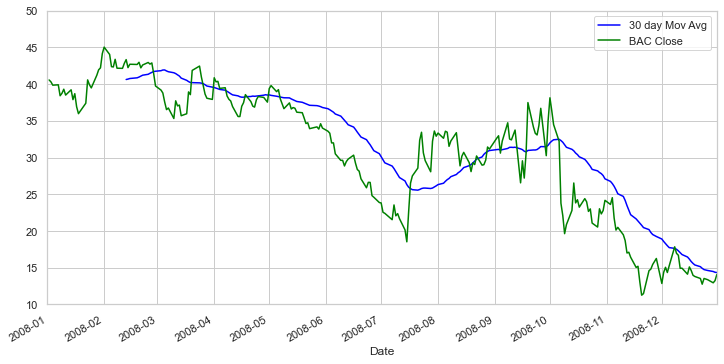

In [28]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day Mov Avg',color='blue')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close',color='green')
plt.xlim(('2008-01-01','2008-12-31'))
plt.ylim((10,50))
plt.legend();

**Create a heatmap of the correlation between the stocks Close Price.**

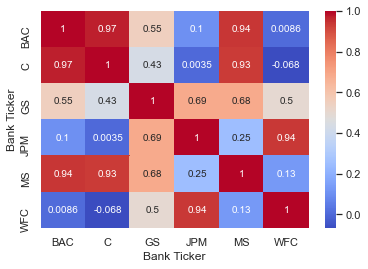

In [29]:
stocks_close_price = bank_stocks.xs(key='Close',level='Stock Info',axis=1)
close_corr = stocks_close_price.corr()
sns.heatmap(data= close_corr, annot=True, cmap='coolwarm')

**Use seaborn's clustermap to cluster the correlations together:**

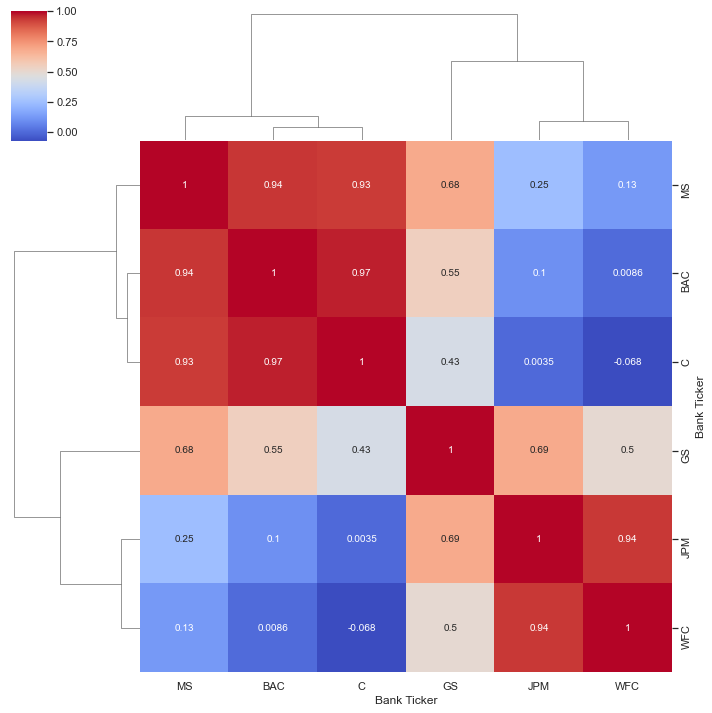

In [30]:
sns.clustermap(data=close_corr, annot=True, cmap='coolwarm')

The clustermap above shows that seaborn tries to group together **Citigroup**, **Bank of America** and **Morgan Stanley** and their correlation together into kind of one group while **Goldman Sachs**, **JP Morgan** and **Wells Fargo** into another group having some sort of correlation to each other. 

The clustermap also shows which stocks are most correlated to each other. For example, it can be observed that **JP Morgan** is well correlated with **Wells Fargo** while **Morgan Stanley** is well correlated with **Bank of America**.

# Part 2

Now we will use cufflinks library to create some Technical Analysis plots.

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [31]:
bac2015 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac2015.iplot(kind='candle',title= "Bank of America's stock from Jan 1st 2015 to Jan 1st 2016")

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [32]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [33]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')